In [1]:
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

import itertools
import pandas as pd
from IPython.display import clear_output

In [2]:
df = np.loadtxt('etmgeg_280.txt', skiprows=49, delimiter= ',', dtype= str)

In [3]:
T = df[:,1]
date = []
for t in T:
    date.append(datetime.datetime.strptime(t, '%Y%m%d'))
T = list(df[:,11])
for i in range(len(T)):
    T[i] = T[i].replace(" ", '')
    if T[i] == '':
        T[i] = 0
T = np.array(T, dtype= float) / 10

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


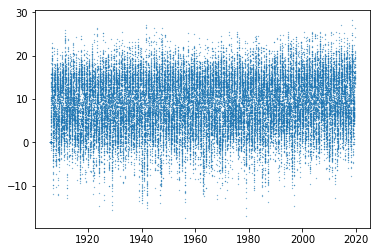

In [4]:
plt.plot(date, T, '.', markersize = 0.5 )

In [5]:
DF = pd.DataFrame({'temp': T,'week': 0*np.array(T),'month': 0*np.array(T)}, index=date)
week = []
month = []
Q  = 0
for i in range(len(date)):
    month.append(int(date[i].month))
    week.append(int(date[i].isocalendar()[1]))
    Q += 1
    if Q == 100:
        clear_output(wait = True)
        print(np.round(i/len(date)*100,2),'%')
        Q =  0
DF['week'] = week
DF['month'] = month

99.81 %


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Series.data is deprecated and will be removed in a future version
  


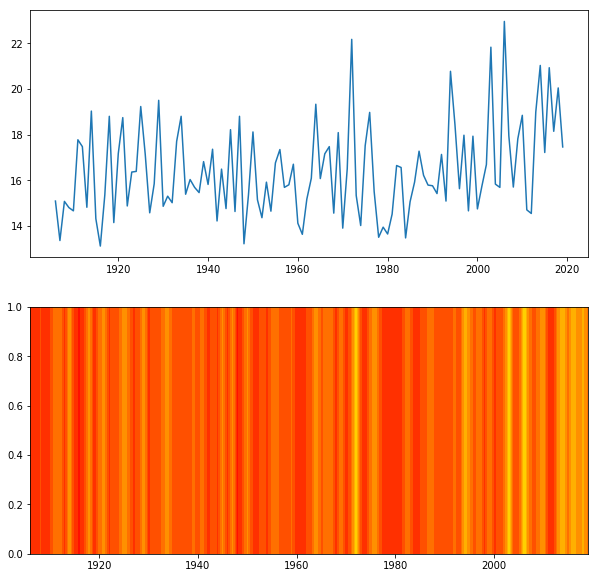

In [6]:
df = DF[DF['week'] == 29]
P = df.groupby(df.index.year)['temp'].mean()

plt.figure(figsize=(10,10))
plt.subplot(211)
plt.plot(P.index, P)
plt.subplot(212)
z = np.array([P.data, P.data])
y = [0,1]
x = P.index
x,y = np.meshgrid(x,y)
plt.contourf(x,y,z, cmap = 'autumn')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Series.data is deprecated and will be removed in a future version
  


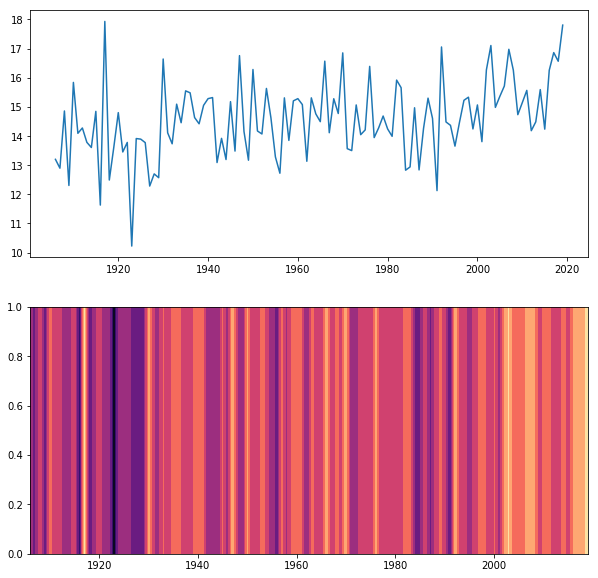

In [7]:
df = DF[DF['month'] == 6]
P = df.groupby(df.index.year)['temp'].mean()

plt.figure(figsize=(10,10))
plt.subplot(211)
plt.plot(P.index, P)
plt.subplot(212)
z = np.array([P.data, P.data])
y = [0,1]
x = P.index
x,y = np.meshgrid(x,y)
plt.contourf(x,y,z, cmap = 'magma')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Series.data is deprecated and will be removed in a future version
  if __name__ == '__main__':


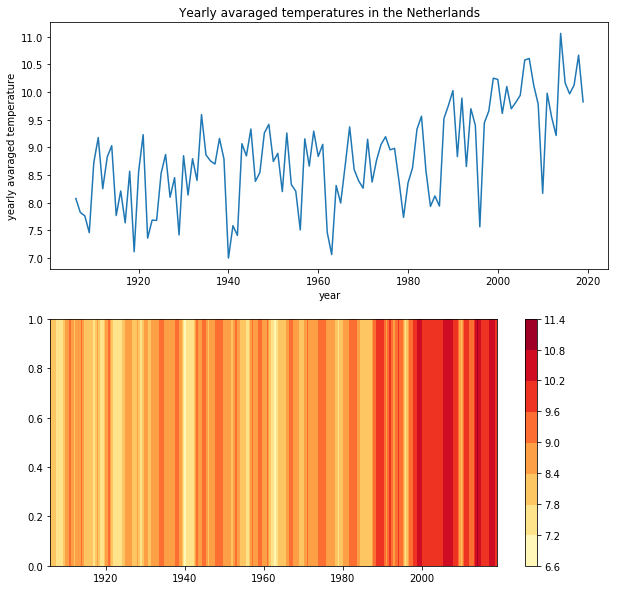

In [8]:
P = DF.groupby(DF.index.year)['temp'].mean()
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title('Yearly avaraged temperatures in the Netherlands')
plt.plot(P.index, P)
plt.ylabel('yearly avaraged temperature')
plt.xlabel('year')
plt.subplot(212)
z = np.array([P.data, np.array(P.data)])
y = [0,1]
x = P.index
x,y = np.meshgrid(x,y)
I = plt.contourf(x,y,z, cmap = 'YlOrRd')
plt.colorbar(I)
plt.savefig('climate change', dpi = 200)
plt.show()